In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe

##### Прочитаем данные о реальной начисленной заработной плате и преобразуем их.

In [2]:
real_pay = pd.read_excel(io='../social_russia_data/cash_real_income_wages_2015_2020.xlsx', sheet_name=3, header=0, index_col=0)
real_pay = to_modify_dataframe(real_pay)
real_pay = real_pay.rename(lambda arg: f'Реальная начисленная заработная плата в {arg} году в % к предыдущему году, руб.', axis=1)
real_pay.head()

Число регионов России - 85.


,"Реальная начисленная заработная плата в 2015 году в % к предыдущему году, руб.","Реальная начисленная заработная плата в 2016 году в % к предыдущему году, руб.","Реальная начисленная заработная плата в 2017 году в % к предыдущему году, руб.","Реальная начисленная заработная плата в 2018 году в % к предыдущему году, руб.","Реальная начисленная заработная плата в 2019 году в % к предыдущему году, руб.","Реальная начисленная заработная плата в 2020 году в % к предыдущему году, руб."
Белгородская область,93.2,100.8,104.5,106.8,104.0,104.8
Брянская область,89,98.5,103.2,107.0,104.0,102.9
Владимирская область,91,99.2,103.6,109.9,103.5,103.0
Воронежская область,89.1,99.1,102.8,108.7,103.4,103.2
Ивановская область,87.9,97.6,102.1,106.0,102.1,101.6


##### Посмотрим корреляцию признаков.

In [3]:
sns.heatmap(real_pay.corr(), annot=True);

ValueError: could not convert string to float: '…'

##### И здесь у нас имеется неявный пропуск в данных. Можно предположить, что с большой вероятностью этот пропуск имеется в 2015 году для Республики Крым и города Севастополь.

In [4]:
print(real_pay.loc['Республика Крым'])

Реальная начисленная заработная плата в 2015 году в % к предыдущему году, руб.        …
Реальная начисленная заработная плата в 2016 году в % к предыдущему году, руб.     96.2
Реальная начисленная заработная плата в 2017 году в % к предыдущему году, руб.    103.6
Реальная начисленная заработная плата в 2018 году в % к предыдущему году, руб.    110.5
Реальная начисленная заработная плата в 2019 году в % к предыдущему году, руб.    105.3
Реальная начисленная заработная плата в 2020 году в % к предыдущему году, руб.    101.5
Name: Республика Крым, dtype: object


In [5]:
print(real_pay.loc['Севастополь'])

Реальная начисленная заработная плата в 2015 году в % к предыдущему году, руб.        …
Реальная начисленная заработная плата в 2016 году в % к предыдущему году, руб.    101.1
Реальная начисленная заработная плата в 2017 году в % к предыдущему году, руб.    108.1
Реальная начисленная заработная плата в 2018 году в % к предыдущему году, руб.    111.8
Реальная начисленная заработная плата в 2019 году в % к предыдущему году, руб.    103.5
Реальная начисленная заработная плата в 2020 году в % к предыдущему году, руб.    101.3
Name: Севастополь, dtype: object


##### Так оно и есть. Поскольку в Интернете я не смог найти недостающие данные, это признак я предлагаю удалить.

In [6]:
real_pay = real_pay.drop(columns='Реальная начисленная заработная плата в 2015 году в % к предыдущему году, руб.')

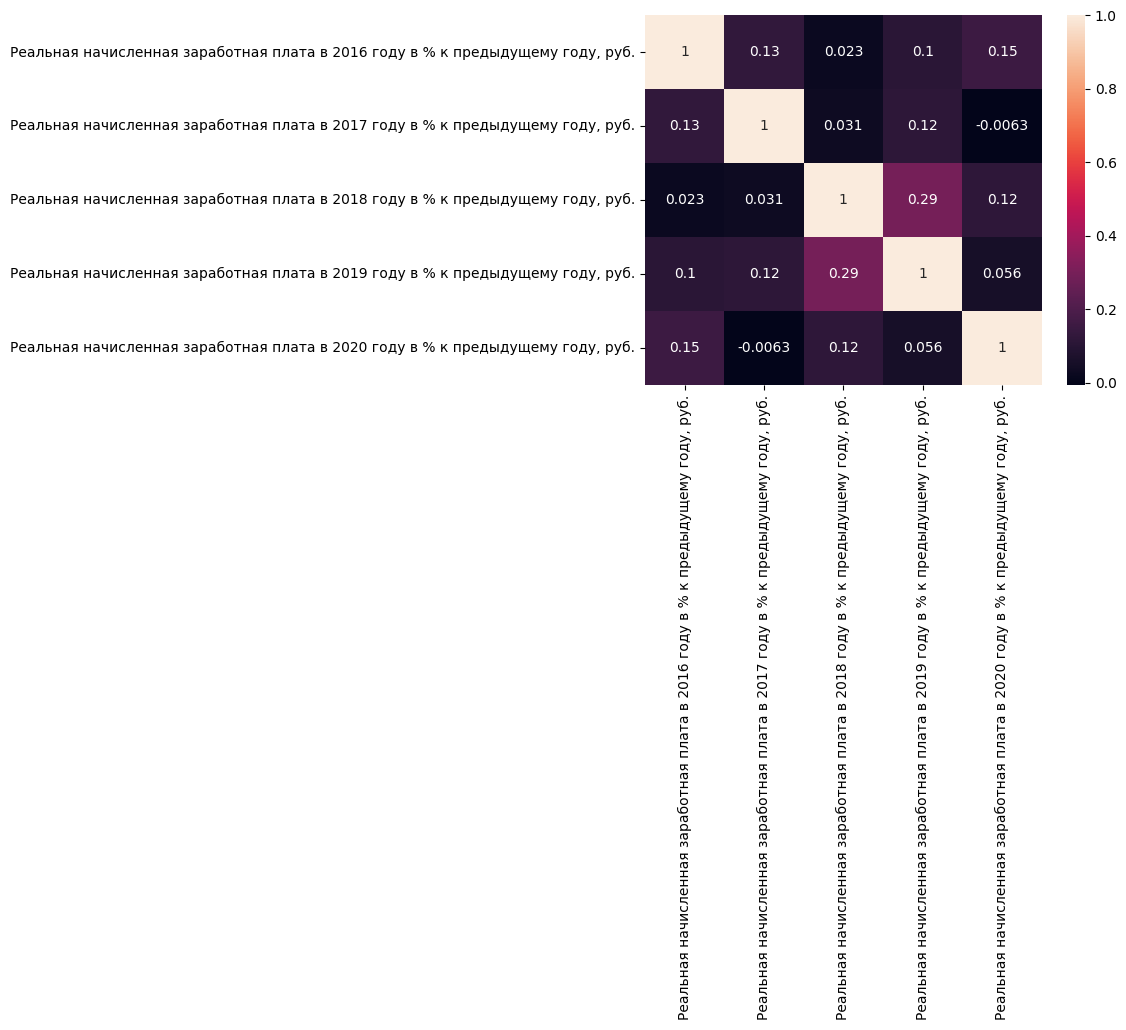

In [7]:
sns.heatmap(real_pay.corr(), annot=True);

##### Данные не коррелированы.

In [8]:
real_pay.to_csv('../datasets_mod/real_pay.csv', sep=',')